In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
from IPython.core.pylabtools import figsize
from scipy.stats import percentileofscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn as sk
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_name = "suicide.csv"
dataset = pd.read_csv(file_name)

dataset = dataset[dataset.year >= 1995] #用 1995-2013年的数据  
dataset= dataset[dataset.year <= 2013]

dataset=dataset.rename(columns={'Individuals using the Internet (% of population)':'Internetusers','Expense (% of GDP)':'Expenses',
                                 'Compensation of employees (% of expense)':'EmployeeCompensation','Unemployment, total (% of total labor force) (modeled ILO estimate)':'Unemployment',
                                 'Physicians (per 1,000 people)':'Physicians','Strength of legal rights index (0=weak to 12=strong)':'StrengthofLegalRightsIndex','Life expectancy at birth, total (years)':'LifeExpectancyatBirth',
                                'Mobile cellular subscriptions (per 100 people)':'MobileCellularSubscriptions','Refugee population by country or territory of origin':'Refugee',
                                'Contributing family workers, total (% of total employment) (modeled ILO estimate)':'ContributingFamilyWorkers','Access to electricity (% of population)':'AccesstoElectricity',
                                'Lower secondary completion rate, total (% of relevant age group)':'LowerSecondaryCompletionRate','Labor force, total':'LaborForce'})



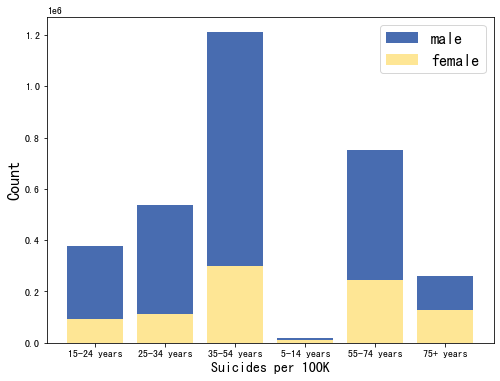

In [4]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(dataset.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(dataset.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[8])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Suicides per 100K', fontsize=14)
plt.show()

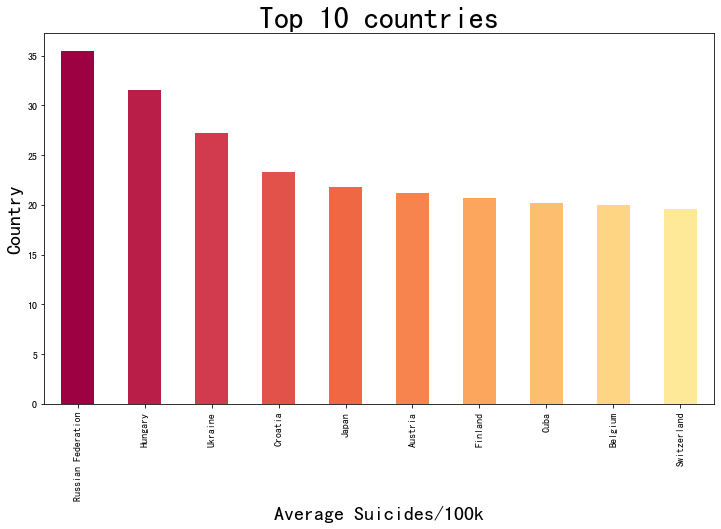

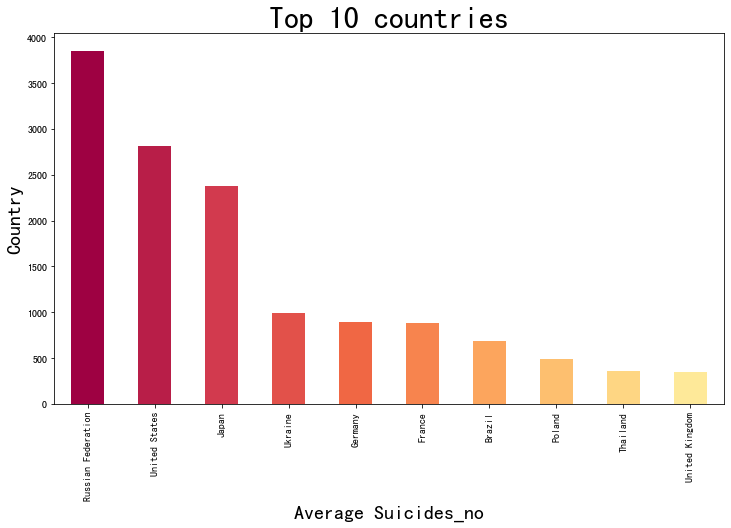

In [5]:
col = plt.cm.Spectral(np.linspace(0, 1, 22))
plt.figure(figsize=(12, 15))

plt.subplot(211)
#自杀率（放大1000倍）的平均值最高的前10个国家
dataset.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='bar', color=col) 
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.figure(figsize=(12, 15))

plt.subplot(212)
#自杀人数的平均值最高的前10个国家
dataset.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='bar', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);
plt.title('Top 10 countries', fontsize=30)
plt.show()

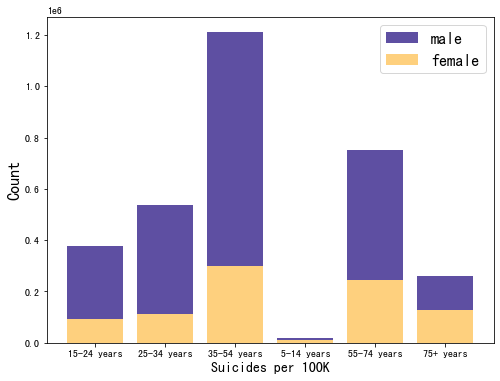

In [6]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(dataset.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(dataset.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[19])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlabel('Suicides per 100K', fontsize=14)
plt.show()

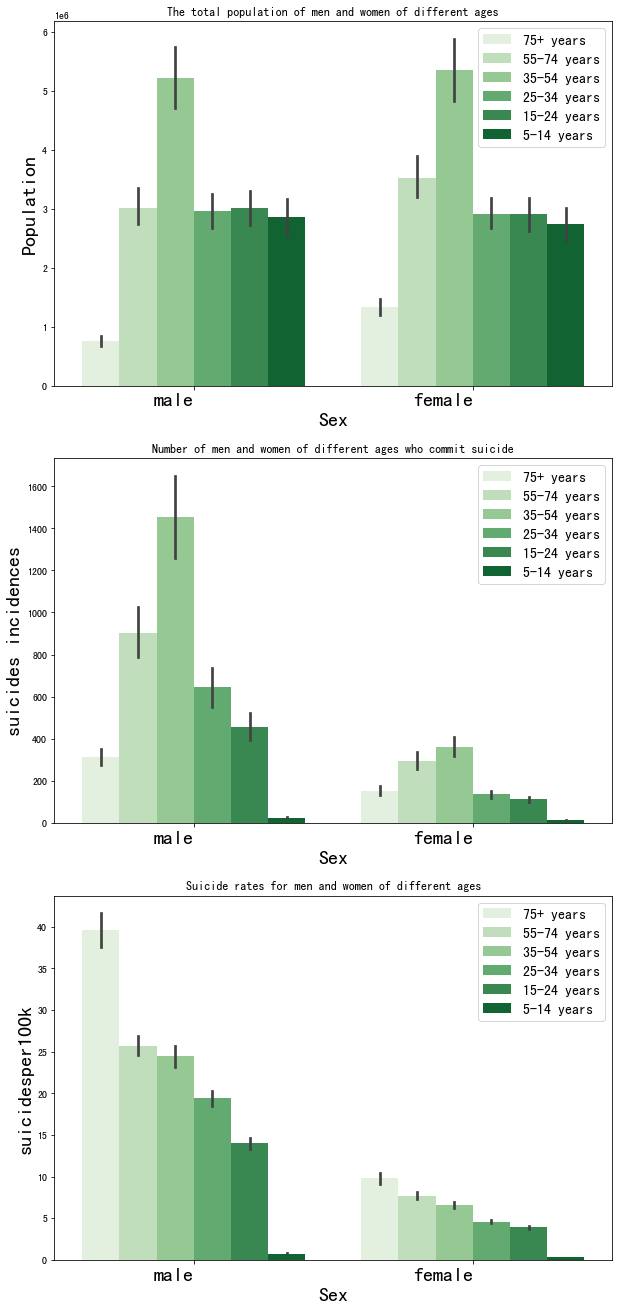

In [7]:
plt.figure(figsize=(10, 16))

#总人口的各个年龄段的性别分布
plt.subplot(311)
sns.barplot(x='sex', y='population', hue='age', data=dataset, palette="Greens")  #hue按年龄分组
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.title("The total population of men and women of different ages")
plt.legend(fontsize=14, loc='best')

#自杀人数的各个年龄段的性别分布
plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=dataset, palette="Greens")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.title("Number of men and women of different ages who commit suicide")
plt.legend(fontsize=14)

#自杀率（放大1000倍）的各个年龄段的性别分布
plt.subplot(313)
sns.barplot(x='sex', y='suicidesper100k', hue='age', data=dataset,palette="Greens")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.title("Suicide rates for men and women of different ages")
plt.legend(fontsize=14);

plt.subplots_adjust(top=1.2)
plt.show()

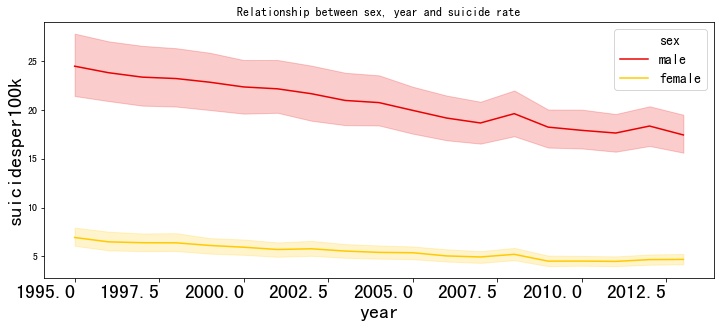

In [8]:
plt.figure(figsize=(12, 16))

# 具体按性别和年份 来看 男女的自杀率
plt.subplot(311)
sns.lineplot(x='year', y='suicidesper100k', hue='sex', data=dataset, palette="hot")  #hue按年龄分组
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicidesper100k', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.legend(fontsize=14, loc='best')  
plt.title("Relationship between sex, year and suicide rate")
plt.show()

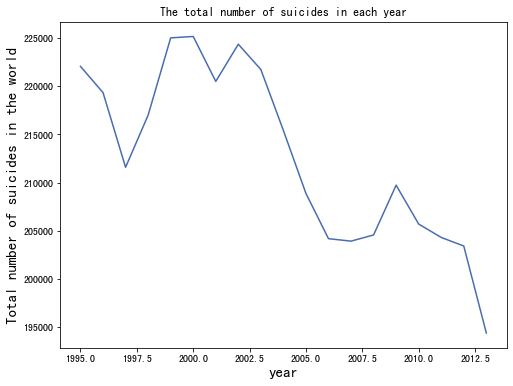

In [9]:
plt.figure(figsize=(8, 6))

#选出year列并且去除重复的年份
year = dataset.groupby('year').year.unique()

#各个年份的自杀人数汇总
#使用seaborn进行可视化,输入的数据必须为dataframe
totalpyear = pd.DataFrame(dataset.groupby('year').suicides_no.sum())   

plt.plot(year.index[0:19], totalpyear[0:19], color=col[18])  #选取范围为[0:31]  1985年到2015年
plt.xlabel('year', fontsize=15)
plt.ylabel('Total number of suicides in the world', fontsize=15)
plt.title("The total number of suicides in each year")
plt.show()

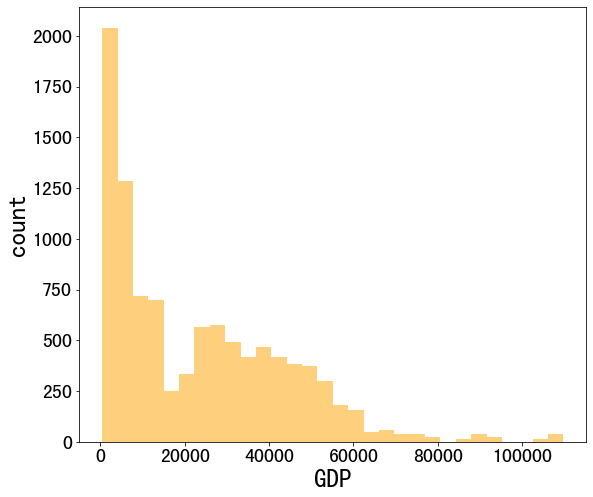

In [10]:
plt.figure(figsize=(20, 8))


# 年人均国内生产总值的分布情况，y轴为个数
plt.subplot(122)
plt.hist(dataset.GDPpcapital, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=25)
plt.xticks(rotation = 0,fontsize = 20)  
plt.ylabel('count', fontsize=25)
plt.yticks(fontsize = 20)   
plt.show()

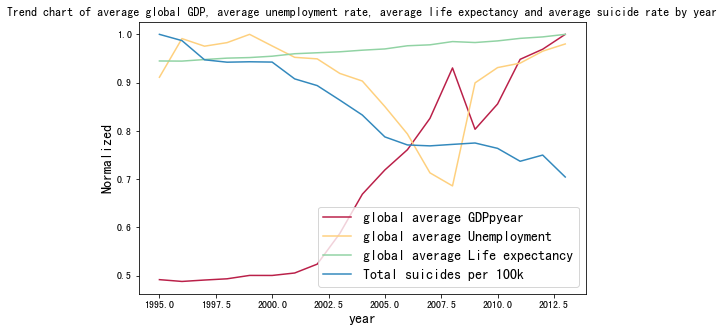

In [11]:
plt.figure(figsize=(8, 5))

# suicides：“GDP年度国内生产总值（美元）”，“雇员补偿%”，“失业人数%”，“预期寿命” 按“年份”分组
suicides = dataset[['year', 'GDPpyear', 'EmployeeCompensation', 'Unemployment', 'LifeExpectancyatBirth']].groupby('year').mean()

# suicides['Suicides'] 为各年份的自杀率总数
suicides['Suicides'] = dataset[['country', 'year', 'suicidesper100k']].groupby('year').sum()

plt.plot(suicides.index, suicides.GDPpyear/suicides.GDPpyear.max(), color=col[1])  

plt.plot(suicides.index, suicides.Unemployment/suicides.Unemployment.max(), color=col[7])

# suicides.Lifeexpectancy  ； 各年的预期寿命
plt.plot(suicides.index, suicides.LifeExpectancyatBirth/suicides.LifeExpectancyatBirth.max(), color=col[14])

# suicides.Suicides ：各年的自杀率
plt.plot(suicides.index, suicides.Suicides/suicides.Suicides.max(), color=col[17])

plt.legend(
            ['global average GDPpyear',                            #红线
            'global average Unemployment',                         #黄线
            'global average Life expectancy',                      #绿线
            'Total suicides per 100k'], fontsize=14, loc='best'    #蓝线
            )
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title("Trend chart of average global GDP, average unemployment rate, average life expectancy and average suicide rate by year")
plt.show()

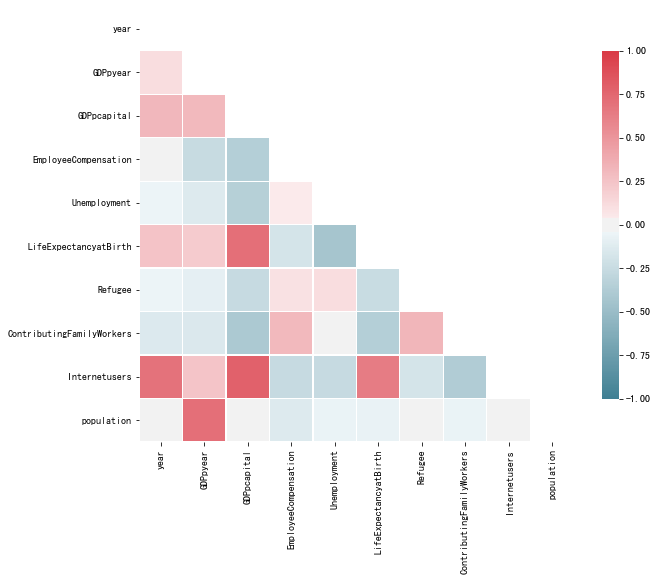

In [12]:
totalfeatures=['country','year','GDPpyear','GDPpcapital','EmployeeCompensation','Unemployment',
          'LifeExpectancyatBirth','Refugee','ContributingFamilyWorkers','Internetusers','population']
dataset=dataset[totalfeatures]

corr = dataset.corr() #相关系数矩阵，即给出了任意两个变量之间的相关系数

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 在Seaborn中创建热图
f, ax = plt.subplots(figsize=(10, 8))
# 生成自定义发散颜色图
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 绘制热图

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,  
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8})